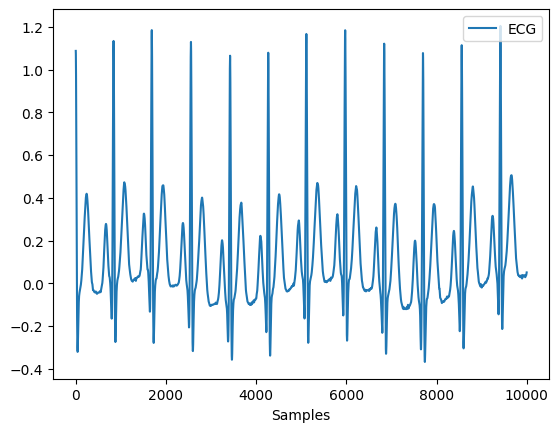

In [3]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import pycatch22

ecg = nk.ecg_simulate(duration=10, heart_rate=70)

data = pd.DataFrame({"ECG": ecg})

nk.signal_plot(data)